# 2602081815 - Landry Aidan Liauw

# Link Video: https://youtu.be/eOsl20KfUuE

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import pickle

import matplotlib.pyplot as plt
import seaborn as sns

# Data processing

In [83]:
df = pd.read_csv('data_1A.csv', index_col=0)

In [84]:
df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,28,admin.,single,university.degree,no,yes,no,telephone,may,fri,1128.0,3,999,0,nonexistent,no
1,30,admin.,single,university.degree,no,no,no,cellular,may,thu,199.0,1,999,0,nonexistent,no
2,49,self-employed,divorced,university.degree,no,yes,no,cellular,jul,wed,1124.0,2,999,0,nonexistent,yes
3,33,management,married,high.school,no,yes,no,telephone,may,fri,178.0,2,999,0,nonexistent,no
4,50,services,married,unknown,unknown,no,no,telephone,may,tue,144.0,1,999,0,nonexistent,no
5,51,housemaid,divorced,high.school,no,yes,no,cellular,jul,thu,241.0,2,999,0,nonexistent,no
6,56,management,divorced,university.degree,no,no,no,cellular,sep,tue,277.0,1,999,1,failure,yes
7,38,admin.,married,unknown,no,yes,no,cellular,jul,wed,481.0,3,999,0,nonexistent,yes
8,30,services,single,high.school,no,no,no,cellular,nov,mon,104.0,2,999,0,nonexistent,no
9,49,admin.,divorced,university.degree,unknown,yes,yes,cellular,aug,fri,557.0,5,999,0,nonexistent,no


In [85]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
8232,45,retired,divorced,university.degree,no,yes,no,cellular,jul,tue,372.0,4,999,0,nonexistent,no
8233,51,technician,married,university.degree,no,yes,no,cellular,aug,wed,512.0,5,999,0,nonexistent,yes
8234,52,admin.,divorced,university.degree,no,no,no,telephone,jun,mon,201.0,3,999,0,nonexistent,no
8235,51,blue-collar,married,basic.4y,no,no,no,telephone,jun,thu,16.0,9,999,0,nonexistent,no
8236,46,blue-collar,married,basic.4y,unknown,yes,yes,telephone,may,wed,125.0,1,999,0,nonexistent,no


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8237 entries, 0 to 8236
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          8237 non-null   int64  
 1   job          8230 non-null   object 
 2   marital      8237 non-null   object 
 3   education    8237 non-null   object 
 4   default      8237 non-null   object 
 5   housing      8237 non-null   object 
 6   loan         8237 non-null   object 
 7   contact      8237 non-null   object 
 8   month        8237 non-null   object 
 9   day_of_week  8237 non-null   object 
 10  duration     8228 non-null   float64
 11  campaign     8237 non-null   int64  
 12  pdays        8237 non-null   int64  
 13  previous     8237 non-null   int64  
 14  poutcome     8237 non-null   object 
 15  y            8237 non-null   object 
dtypes: float64(1), int64(4), object(11)
memory usage: 1.1+ MB


In [87]:
df.shape

(8237, 16)

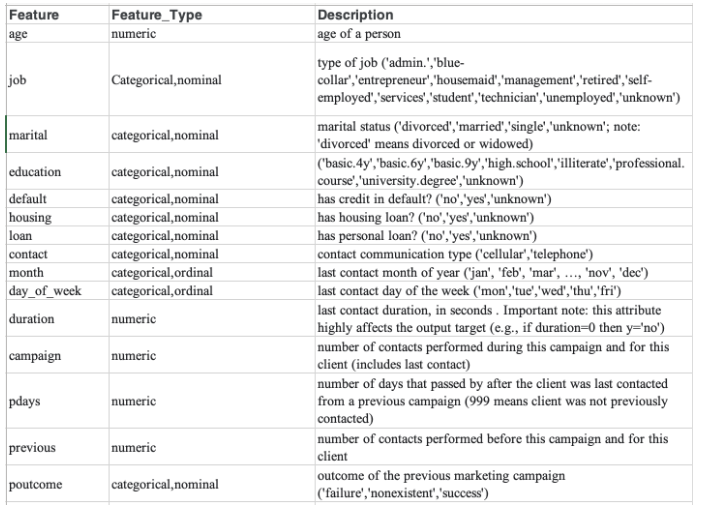

In [88]:
df.describe()

,age,duration,campaign,pdays,previous
count,8237.000000,8228.000000,8237.000000,8237.000000,8237.000000
mean,39.875926,259.756320,2.555663,962.719072,0.172757
std,10.305515,257.616697,2.768591,186.305694,0.499534
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,104.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,320.000000,3.000000,999.000000,0.000000
max,88.000000,3509.000000,42.000000,999.000000,6.000000


In [89]:
df['job'].value_counts()

job
admin.           2084
blue-collar      1865
technician       1312
services          801
management        612
retired           308
self-employed     288
entrepreneur      288
housemaid         221
unemployed        209
student           176
unknown            66
Name: count, dtype: int64

In [90]:
df['marital'].value_counts()

marital
married     4942
single      2369
divorced     905
unknown       21
Name: count, dtype: int64

In [91]:
df['education'].value_counts()

education
university.degree      2506
high.school            1874
basic.9y               1206
professional.course    1022
basic.4y                807
basic.6y                462
unknown                 357
illiterate                3
Name: count, dtype: int64

In [92]:
df['default'].value_counts()

default
no         6497
unknown    1740
Name: count, dtype: int64

In [93]:
df['housing'].value_counts()

housing
yes        4346
no         3695
unknown     196
Name: count, dtype: int64

In [94]:
df['loan'].value_counts()

loan
no         6779
yes        1262
unknown     196
Name: count, dtype: int64

In [95]:
df['poutcome'].value_counts()

poutcome
nonexistent    7123
failure         841
success         273
Name: count, dtype: int64

In [96]:
categories = {
    'job': ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management', 'retired', 'self-employed', 'services', 'student', 'technician', 'unemployed', 'unknown'],
    'marital': ['divorced', 'married', 'single', 'unknown'],
    'education': ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown'],
    'default': ['no', 'yes', 'unknown'],
    'housing': ['no', 'yes', 'unknown'],
    'loan': ['no', 'yes', 'unknown'],
    'contact': ['cellular', 'telephone'],
    'poutcome': ['failure', 'nonexistent', 'success']
}

In [97]:
df.isnull().values.any()

True

In [98]:
numeric = ['age', 'duration', 'campaign', 'pdays', 'previous']
categoric = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
cat_label = ['month', 'day_of_week']

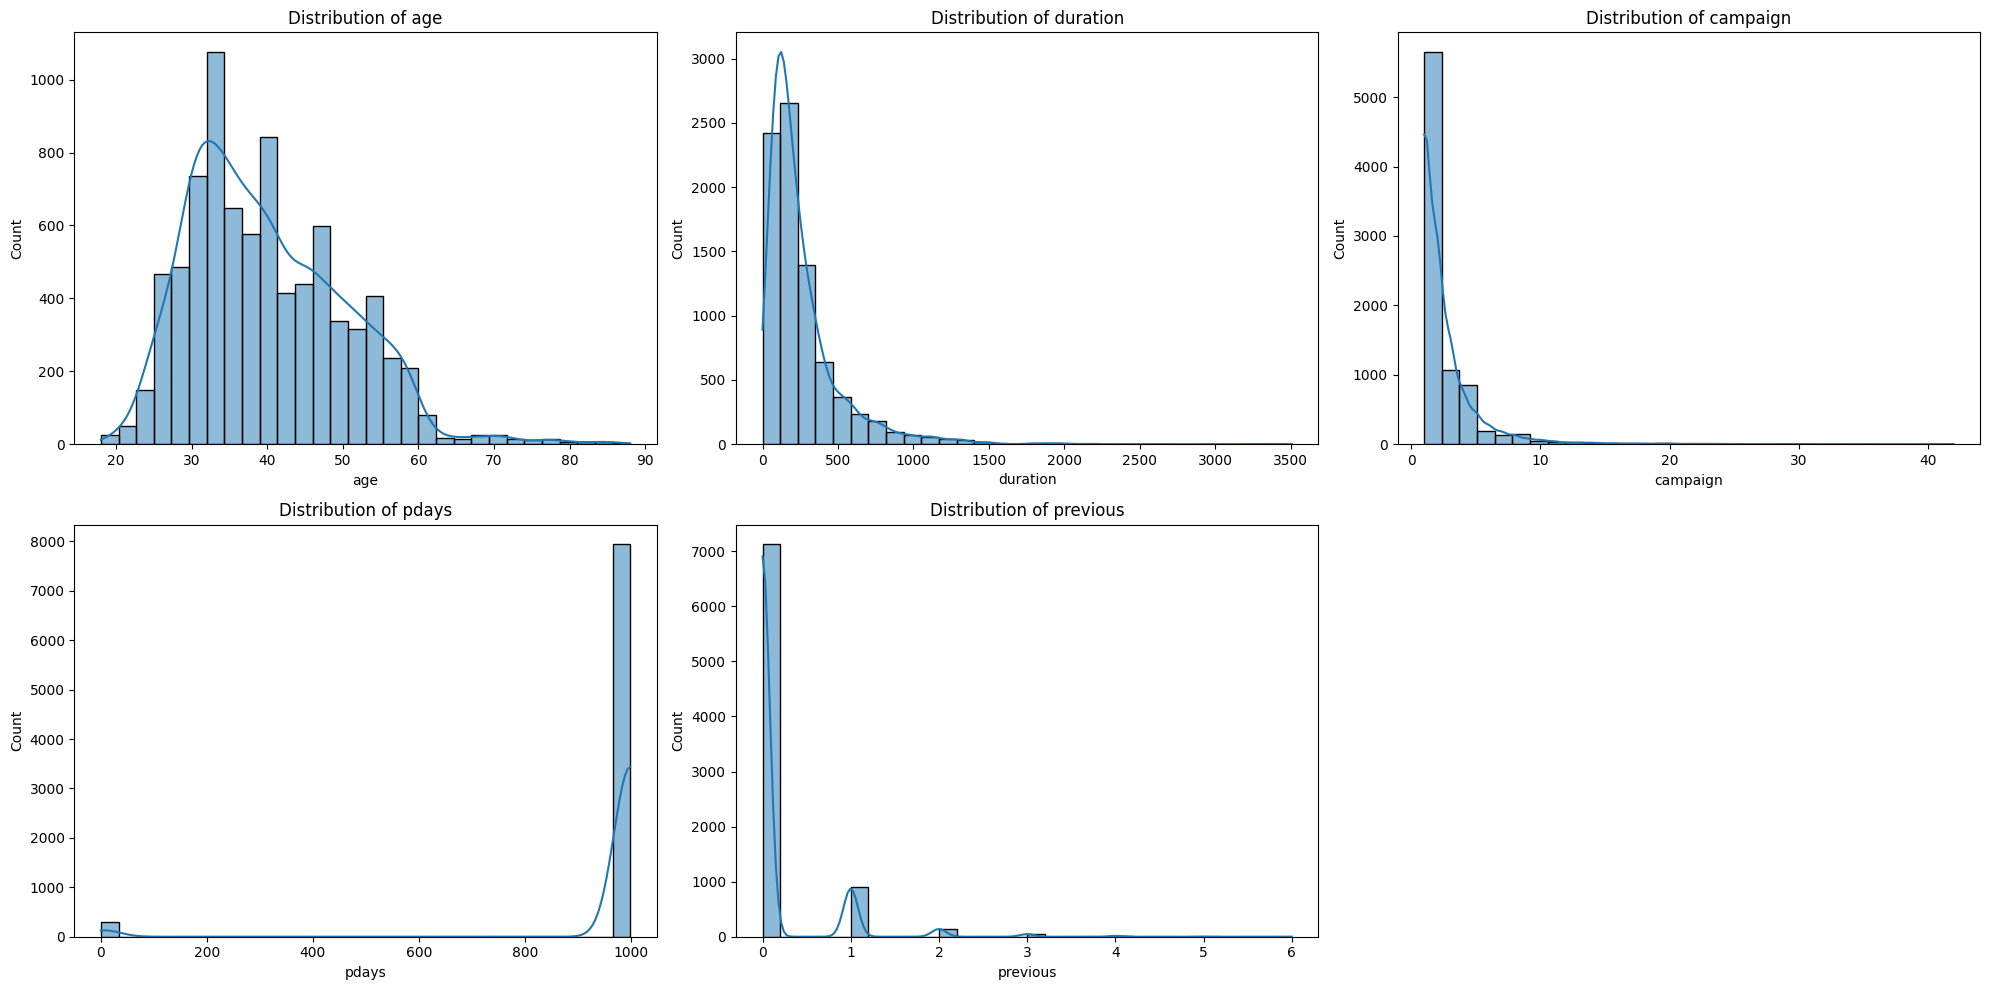

In [99]:
plt.figure(figsize=(20, 10))
for i, feature in enumerate(numeric):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [100]:
numeric_tf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categoric_oh_tf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(categories=[categories[col] for col in categoric], handle_unknown='ignore'))
])

categoric_label_tf = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder())
])

preprocess = ColumnTransformer(
    transformers=[
        ('num', numeric_tf, numeric),
        ('cat_onehot', categoric_oh_tf, categoric),
        ('cat_label', categoric_label_tf, cat_label)
    ]
)

In [101]:
x = df.drop('y', axis=1)
y = df['y']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=777)

# KNN

In [102]:
knn_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', KNeighborsClassifier())
])

knn_pipeline.fit(x_train, y_train)

y_pred_knn = knn_pipeline.predict(x_test)
print("KNN Model:\n", classification_report(y_test,y_pred_knn))

KNN Model:
               precision    recall  f1-score   support

          no       0.92      0.96      0.94      1457
         yes       0.56      0.36      0.44       191

    accuracy                           0.89      1648
   macro avg       0.74      0.66      0.69      1648
weighted avg       0.88      0.89      0.88      1648



In [103]:
print("Accuracy:",knn_pipeline.score(x_test, y_test))

Accuracy: 0.8932038834951457


# Gradient Boosting

In [104]:
gb_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', GradientBoostingClassifier())
])

gb_pipeline.fit(x_train, y_train)

y_pred_gb = gb_pipeline.predict(x_test)
print("Gradient Boosting Model:\n", classification_report(y_test,y_pred_gb))

Gradient Boosting Model:
               precision    recall  f1-score   support

          no       0.93      0.96      0.94      1457
         yes       0.57      0.41      0.48       191

    accuracy                           0.90      1648
   macro avg       0.75      0.68      0.71      1648
weighted avg       0.88      0.90      0.89      1648



In [105]:
print("Accuracy:",gb_pipeline.score(x_test, y_test))

Accuracy: 0.8962378640776699


# Random Forest

In [106]:
rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocess),
    ('classifier', RandomForestClassifier())
])

rf_pipeline.fit(x_train, y_train)

y_pred_rf = rf_pipeline.predict(x_test)
print("Random Forest Model:\n", classification_report(y_test,y_pred_rf))

Random Forest Model:
               precision    recall  f1-score   support

          no       0.92      0.97      0.94      1457
         yes       0.60      0.35      0.44       191

    accuracy                           0.90      1648
   macro avg       0.76      0.66      0.69      1648
weighted avg       0.88      0.90      0.89      1648



In [107]:
print("Accuracy:",rf_pipeline.score(x_test, y_test))

Accuracy: 0.8974514563106796


<table>
    <thead>
        <tr>
            <th>Model<br></th>
            <th>Accuracy<br></th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <div>KNN<br></div>
            </td>
            <td>0.8932038834951457</td>
        </tr>
        <tr>
            <td>
                <div>Gradient Boosting<br></div>
            </td>
            <td>0.8962378640776699</td>
        </tr>
        <tr>
            <td>Random Forest<br></td>
            <td>0.8974514563106796</td>
        </tr>
    </tbody>
</table>


### Best model seems to be **Random Forest**

# Saving Model

In [108]:
model = rf_pipeline

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)